In [ ]:
import torch
import matplotlib.pyplot as plt
import numpy as np

## Create data

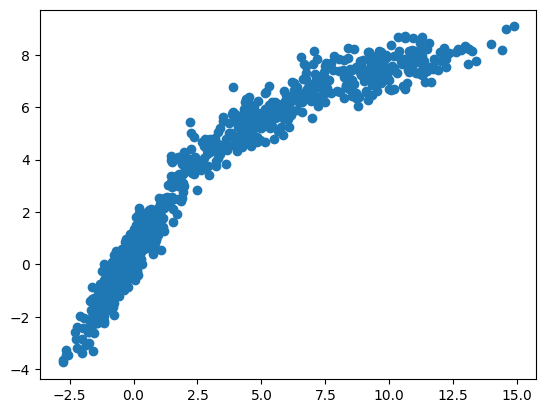

In [ ]:
np.random.seed(0)
xs1= np.random.randn(500)
ys1 = 1.5*xs1+0.5+np.random.randn(500)*0.5
xs2 = np.random.randn(200)*1.5+4.5
ys2 = 0.5*xs2+3+np.random.randn(200)*0.5
xs3 = np.random.randn(200)*2+9.5
ys3 = 0.2*xs3+5.5+np.random.randn(200)*0.5
xs = np.concatenate((xs1,xs2,xs3))
ys = np.concatenate((ys1,ys2,ys3))
plt.scatter(xs,ys)